<a href="https://colab.research.google.com/github/gunacodee/DLT/blob/main/Ex_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - accuracy: 0.0182 - loss: 3.7735 - val_accuracy: 0.0250 - val_loss: 3.7049
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.0300 - loss: 3.6827 - val_accuracy: 0.0375 - val_loss: 3.6897
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - accuracy: 0.0520 - loss: 3.6605 - val_accuracy: 0.0000e+00 - val_loss: 3.7261
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.1105 - loss: 3.5918 - val_accuracy: 0.0875 - val_loss: 3.5812
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.1631 - loss: 3.3827 - val_accuracy: 0.1750 - val_loss: 3.3107
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.2844 - loss: 2.8588 - val_accuracy: 0.4500 - val_loss: 2.7716
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - accuracy: 0.4572 - loss: 2.1944 - val_accuracy: 0.5625 - val_loss: 1.9059
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.6492 - loss: 1.4122 - val_accuracy: 0.7250 - val

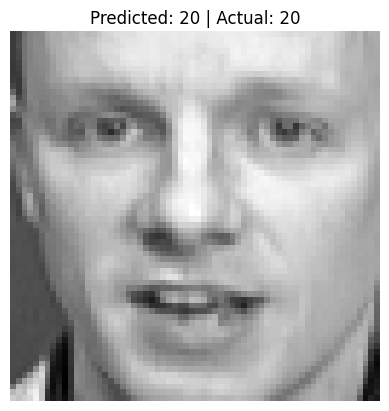

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Step 1-2: Load Olivetti Faces dataset
data = fetch_olivetti_faces()
X = data.images
y = data.target
n_classes = len(np.unique(y))
target_names = np.unique(y)

# Step 3: Preprocess and reshape
X = X.reshape(-1, 64, 64, 1).astype("float32")  # Already scaled between 0 and 1
y = to_categorical(y, n_classes)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(n_classes, activation='softmax')
])

# Step 6: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=16, validation_data=(X_test, y_test))

# Step 8: Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.2f}")

# Step 9: Predict and visualize
def predict_and_display(index):
    sample = X_test[index].reshape(1, 64, 64, 1)
    prediction = model.predict(sample)
    predicted_label = np.argmax(prediction)
    actual_label = np.argmax(y_test[index])
    plt.imshow(X_test[index].reshape(64, 64), cmap='gray')
    plt.title(f"Predicted: {predicted_label} | Actual: {actual_label}")
    plt.axis('off')
    plt.show()

# Test on one sample
predict_and_display(0)

# Optional: Save the model
model.save("olivetti_face_recognition_cnn.h5")
